In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
model=Sequential()
# we have data in 2D show we have to flattern tha data make in one dimension
model.add(Flatten(input_shape=(28,28)))
# creating the hidden layer 1 with 
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\Dell\Desktop\DATA\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [16]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9945 - loss: 0.0171
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9948 - loss: 0.0145
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.9947 - loss: 0.0160
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9956 - loss: 0.0117
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9965 - loss: 0.0103
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9954 - loss: 0.0138
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9963 - loss: 0.0111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9967 - loss: 0.0093
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9971 - loss: 0.0093
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9972 - loss: 0.0079


In [17]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
y_pred=y_pred.argmax(axis=1)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print("accuracy_score is : ",accuracy_score(y_test,y_pred))

accuracy_score is :  0.9768


In [23]:
import matplotlib.pyplot as plt

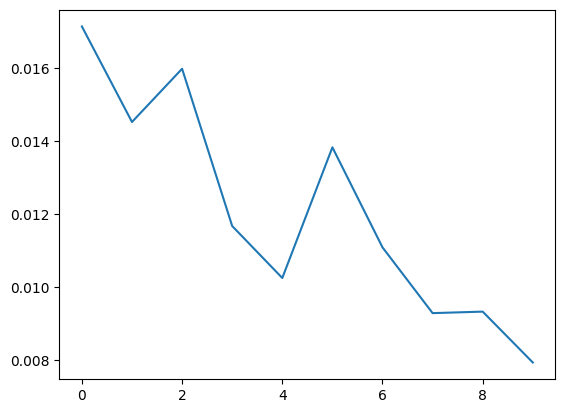

In [26]:
plt.plot(history.history['loss'])

In [32]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


array([7])

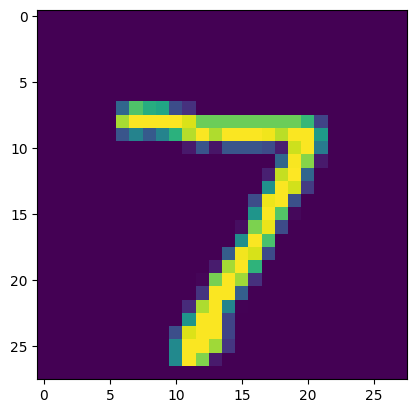

In [31]:
plt.imshow(X_test[0])